## Partie 1 : Préparation des données

In [47]:
# Import des librairies principales
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


# Paramétrage de matplotlib pour de plus beaux graphiques
#plt.style.use('seaborn')

# Pour afficher les graphiques dans le notebook 
%matplotlib inline

In [48]:
df = pd.read_csv(r"C:\Users\pc\Downloads\BIBDA\S3\Intelligence Artificielle 2\TP 1 - Enonce\data house\housing.csv")

In [49]:
# Affichons les premières lignes pour vérifier le chargement
print("Aperçu des 5 premières lignes :")
print(df.head())

Aperçu des 5 premières lignes :
   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY  


In [50]:
print("\nInformations sur le dataset :")
print(df.info())


Informations sur le dataset :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB
None


In [51]:
# Création des variables X et Y
X = df[['total_rooms']]  # Les doubles crochets gardent X comme un DataFrame
y = df['median_house_value']  # Un seul crochet pour y comme une Series

In [52]:
# Affichons la forme de nos variables
print("\nForme de X :", X.shape)
print("Forme de y :", y.shape)

# Aperçu des premières valeurs
print("\nAperçu de X :")
print(X.head())
print("\nAperçu de y :")
print(y.head())


Forme de X : (20640, 1)
Forme de y : (20640,)

Aperçu de X :
   total_rooms
0        880.0
1       7099.0
2       1467.0
3       1274.0
4       1627.0

Aperçu de y :
0    452600.0
1    358500.0
2    352100.0
3    341300.0
4    342200.0
Name: median_house_value, dtype: float64


In [53]:
print("Structure du dataset :")
print(df.info())

Structure du dataset :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB
None


In [54]:
#Vérifions les valeurs manquantes
print("\nNombre de valeurs manquantes par colonne :")
missing_values = df.isnull().sum()
print(missing_values)

#Pourcentage de valeurs manquantes par colonne
print("\nPourcentage de valeurs manquantes par colonne :")
missing_percentage = (df.isnull().sum() / len(df)) * 100
print(missing_percentage)


Nombre de valeurs manquantes par colonne :
longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

Pourcentage de valeurs manquantes par colonne :
longitude             0.000000
latitude              0.000000
housing_median_age    0.000000
total_rooms           0.000000
total_bedrooms        1.002907
population            0.000000
households            0.000000
median_income         0.000000
median_house_value    0.000000
ocean_proximity       0.000000
dtype: float64


In [55]:
#Supprimons les lignes avec des valeurs manquantes
df_clean = df.dropna()

#Vérifions la taille avant et après nettoyage
print("\nTaille du dataset :")
print(f"Avant nettoyage : {df.shape}")
print(f"Après nettoyage : {df_clean.shape}")


Taille du dataset :
Avant nettoyage : (20640, 10)
Après nettoyage : (20433, 10)


In [56]:
# 6. Vérifions qu'il ne reste plus de valeurs manquantes
print("\nVérification finale - valeurs manquantes restantes :")
print(df_clean.isnull().sum())

# Remplaçons le dataframe original par la version nettoyée
df = df_clean


Vérification finale - valeurs manquantes restantes :
longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64


## Partie 2 : Visualisation des données

Colonnes disponibles :
['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 'median_house_value', 'ocean_proximity']


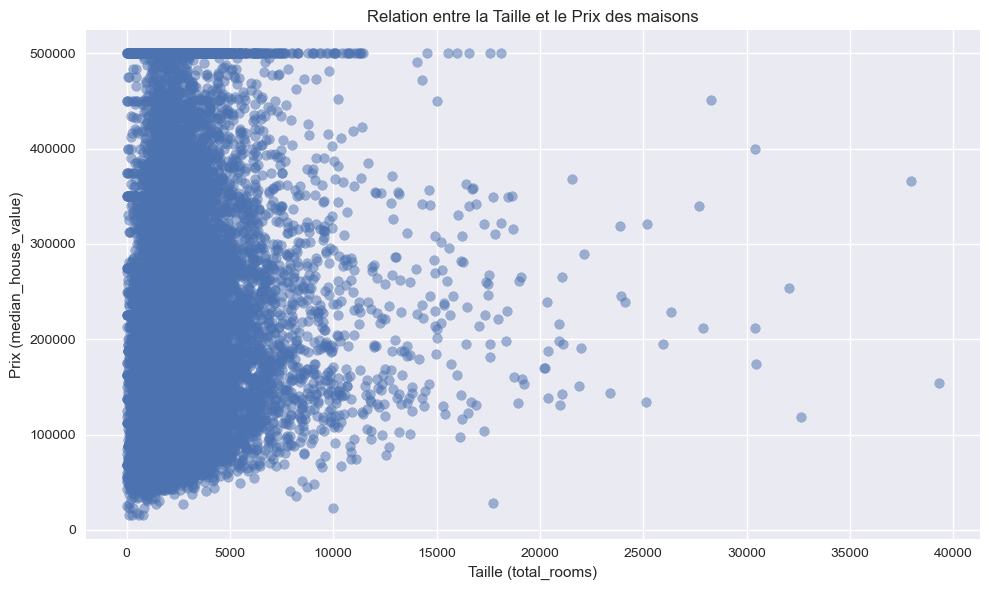

In [57]:
# Affichons d'abord les colonnes disponibles
print("Colonnes disponibles :")
print(df.columns.tolist())

# Création du nuage de points
plt.figure(figsize=(10, 6))
plt.scatter(df['total_rooms'], df['median_house_value'], alpha=0.5)
plt.xlabel('Taille (total_rooms)')
plt.ylabel('Prix (median_house_value)')
plt.title('Relation entre la Taille et le Prix des maisons')
plt.grid(True)
plt.tight_layout()
plt.show()

## Partie 3 : Régression linéaire

In [58]:
# Division des données
X_train, X_test, y_train, y_test = train_test_split(
    X,              # Variables d'entrée
    y,              # Variable cible
    test_size=0.2,  # 20% pour le test
    random_state=42 # Pour la reproductibilité
)

In [59]:
# Affichage des dimensions des ensembles
print("Dimensions des ensembles :")
print(f"X_train : {X_train.shape}")
print(f"X_test  : {X_test.shape}")
print(f"y_train : {y_train.shape}")
print(f"y_test  : {y_test.shape}")

# Vérification rapide des premières lignes
print("\nPremières lignes de X_train :")
print(X_train.head())
print("\nPremières lignes de y_train :")
print(y_train.head())

Dimensions des ensembles :
X_train : (16512, 1)
X_test  : (4128, 1)
y_train : (16512,)
y_test  : (4128,)

Premières lignes de X_train :
       total_rooms
14196       3126.0
8267        3382.0
17445       1897.0
14265       1421.0
2271        2382.0

Premières lignes de y_train :
14196    103000.0
8267     382100.0
17445    172600.0
14265     93400.0
2271      96500.0
Name: median_house_value, dtype: float64


In [60]:
# Création du modèle
model = LinearRegression()

# Entraînement du modèle
model.fit(X_train, y_train)

LinearRegression()

## Partie 4 : Évaluation du modèle

In [61]:
#Prédictions sur l'ensemble de test
y_pred = model.predict(X_test)

In [62]:
#Calcul du RMSE
from sklearn.metrics import mean_squared_error
import numpy as np

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Erreur quadratique moyenne (RMSE) : {rmse:.2f}")

Erreur quadratique moyenne (RMSE) : 113439.89


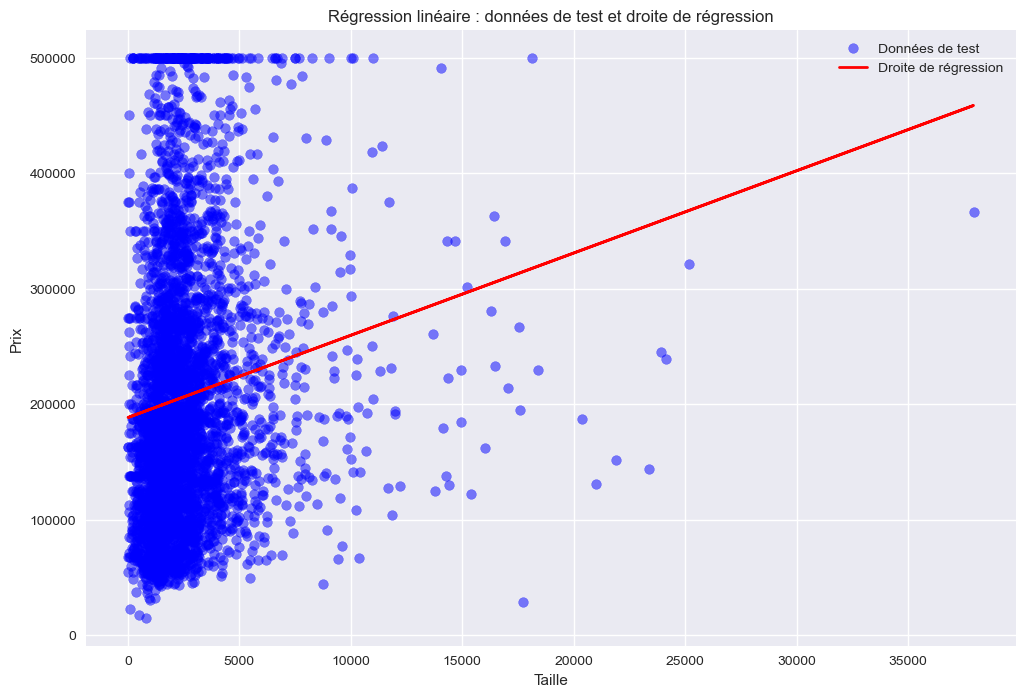

In [63]:
#Visualisation avec le nuage de points et la droite de régression
plt.figure(figsize=(12, 8))

#Nuage de points des données de test
plt.scatter(X_test, y_test, color='blue', alpha=0.5, label='Données de test')

#Droite de régression
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Droite de régression')

#Personnalisation du graphique
plt.xlabel('Taille')
plt.ylabel('Prix')
plt.title('Régression linéaire : données de test et droite de régression')
plt.legend()
plt.grid(True)

plt.show()

## Partie 5 : Interprétation

In [64]:
# Récupération des coefficients du modèle
pente = model.coef_[0]
ordonnee = model.intercept_

# Affichage de l'équation de la droite
print("Équation de la droite de régression :")
print(f"y = {pente:.2f}x + {ordonnee:.2f}")
print("\nOù :")
print("y = Prix prédit")
print("x = Taille")

# Interprétation pratique
print("\nInterprétation :")
print(f"• Pour chaque unité supplémentaire de taille, le prix augmente de {pente:.2f} unités")
print(f"• Quand la taille est 0, le prix de base est de {ordonnee:.2f} unités")

# Exemple concret
x_exemple = 10  # Prenons un exemple avec 10 unités de taille
y_predit = pente * x_exemple + ordonnee
print(f"\nExemple concret :")
print(f"Pour une taille de {x_exemple} unités :")
print(f"Prix prédit = {pente:.2f} × {x_exemple} + {ordonnee:.2f} = {y_predit:.2f}")

# Ajout des annotations pour la pente
x1, x2 = X_test.iloc[0], X_test.iloc[0] + 1
y1 = pente * x1 + ordonnee
y2 = pente * x2 + ordonnee


Équation de la droite de régression :
y = 7.12x + 188373.09

Où :
y = Prix prédit
x = Taille

Interprétation :
• Pour chaque unité supplémentaire de taille, le prix augmente de 7.12 unités
• Quand la taille est 0, le prix de base est de 188373.09 unités

Exemple concret :
Pour une taille de 10 unités :
Prix prédit = 7.12 × 10 + 188373.09 = 188444.33
